In [1]:
from helpers import *

#library to visualize and manipulate data 
import pandas as pd
import numpy as np

#library to tokenize words, create wordclouds and plots
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("news.csv")

In [3]:
#clean the title and summary data
df['title'] = clean_text(df,'title')
df['summary'] = clean_text(df,'summary')

In [4]:
#function defined to count the frequency of each word on news' titles
def count_data_words(df,column):
    with open("spanish.txt") as f:
        lines = f.read().splitlines()

    cv = CountVectorizer(stop_words=lines)
    df_cv = cv.fit_transform(df['title'])
    df_dtm = pd.DataFrame(df_cv.toarray(),columns=cv.get_feature_names())

    df_dtm['year'] = df['year'].tolist()
    df_dtm['month'] = df['month'].tolist()
    df_dtm['name_month'] = df['name_month'].tolist()

    df_top = df_dtm.groupby([column]).sum().transpose()
    df_top = df_top.reset_index(level=0)
    df_top = df_top.rename(columns ={'index':'words'})
    df_top = df_top.drop(df_top.index[-1])
    
    return df_top

In [5]:
#function defined to plot wordcloud
def plot_wordcloud(df,row,col,year):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        if year == '':
            plt.title(f"{value}")
        else: 
            plt.title(f"{value} / {year}")

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

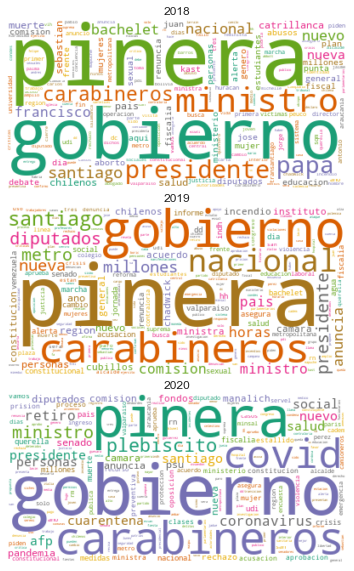

In [6]:
#wordclouds of years  
df_top_year = count_data_words(df,'year')
plot_wordcloud(df_top_year,3,1,'')

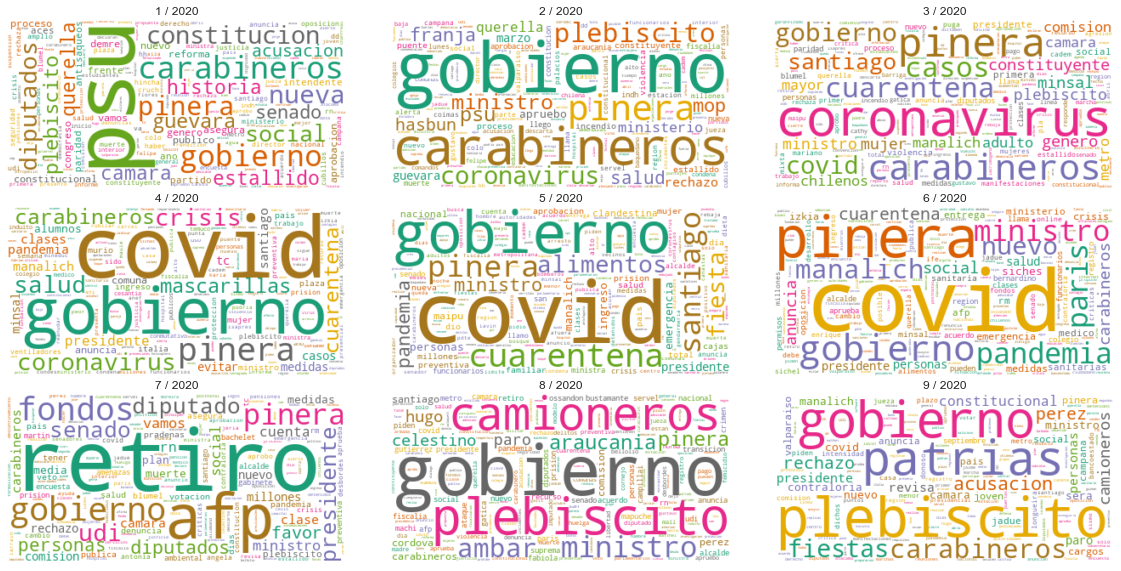

In [7]:
#wordclouds of 2020 months
df_top_2020 = count_data_words(df[df['year']==2020],'month')
plot_wordcloud(df_top_2020,3,3,'2020')

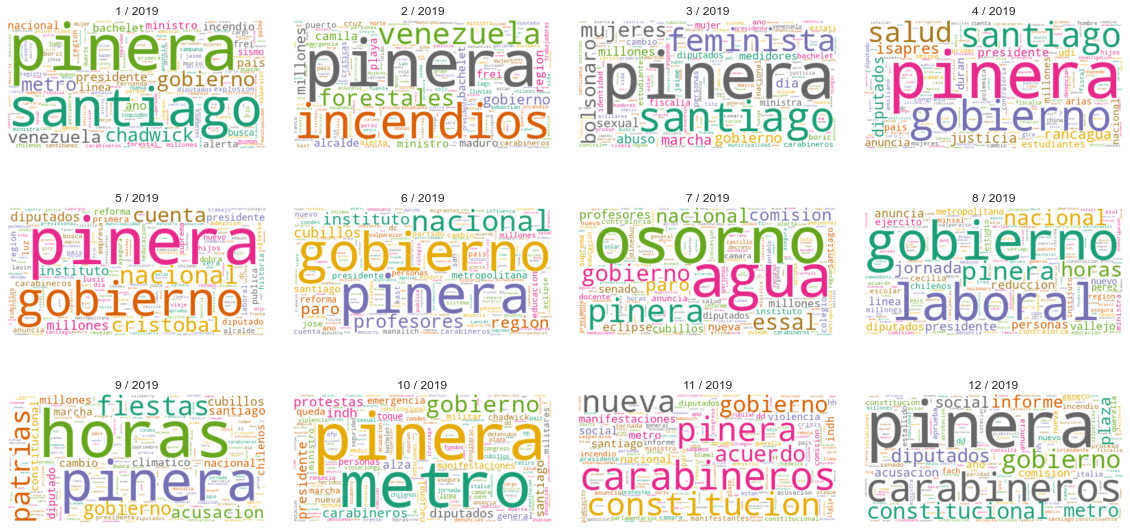

In [8]:
#wordclouds of 2019 months
df_top_2019 = count_data_words(df[df['year']==2019],'month')
plot_wordcloud(df_top_2019,3,4,'2019')

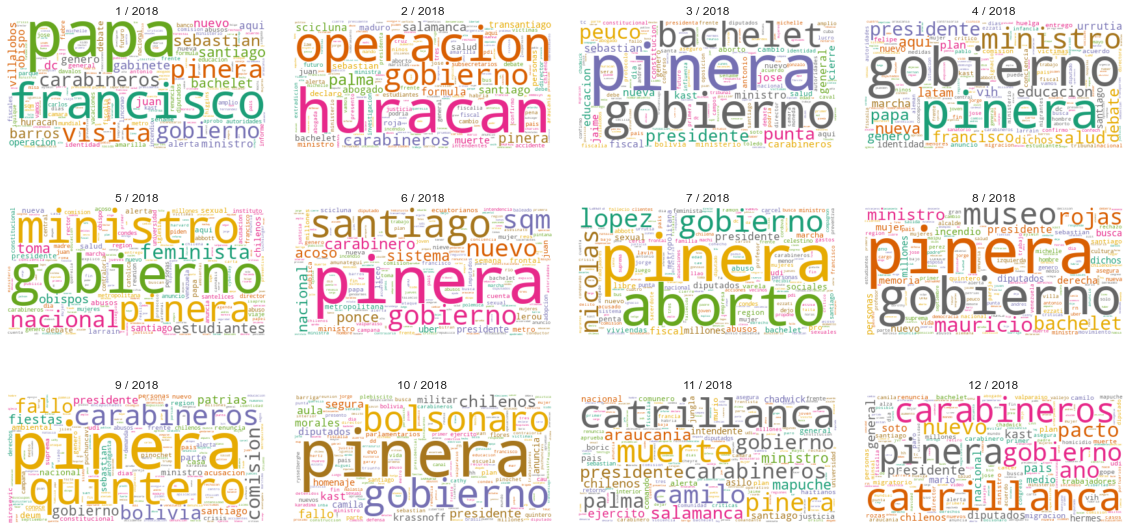

In [9]:
#wordclouds of 2018 months
df_top_2018 = count_data_words(df[df['year']==2018],'month')
plot_wordcloud(df_top_2018,3,4,'2018')

In [10]:
#function to create a frequency table of words
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))

    for value in df.columns[1:]:
        total_news.append(main_df['year'][main_df['year']==value].count())
    
    data = pd.DataFrame({'year':years,'unique words':unique_words,'total words':total_words,'total news':total_news})
    data['words per news'] = data['total words'] / data['total news']
    return data

In [11]:
words_stats(df_top_year,df)

year  unique words  total words  total news  words per news
0  2018         10416        47136        6388        7.378835
1  2019          9396        39273        4678        8.395254
2  2020          7461        29670        3514        8.443369

In [12]:
#function to create a plot to compare top words among years
def plot_freq_words(df, year):
    df_top_year = df
    top_words_2020 = df_top_year.sort_values(year,ascending=False).head(15)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2020['words'],top_words_2020[2020])
    plt.plot(top_words_2020['words'],top_words_2020[2019])
    plt.plot(top_words_2020['words'],top_words_2020[2018])

    plt.legend(['Año 2020','Año 2019','Año 2018'])
    plt.title(f"Comparacion por Años de Palabras más Frecuentes en el {year}",fontsize=14)
    plt.xlabel('Palabras más Frecuentes',fontsize=12)
    plt.ylabel('Frecuencia',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

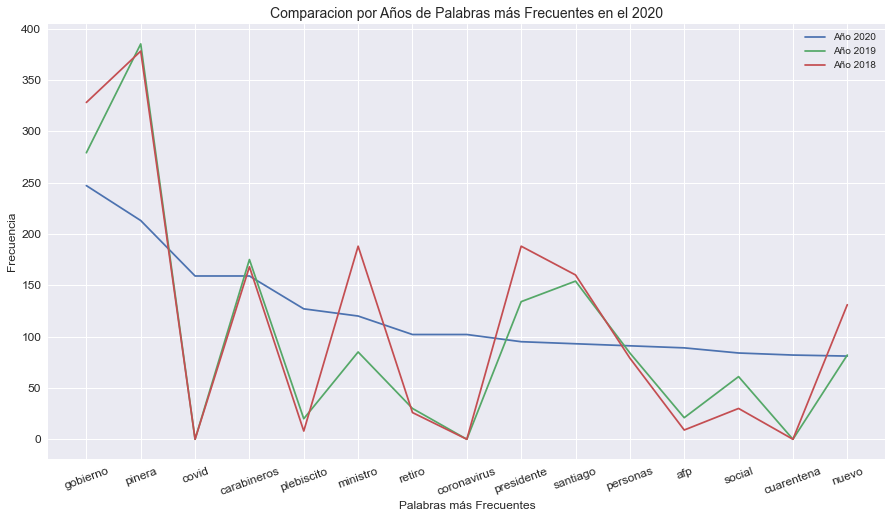

In [13]:
#plot top words of 2020
plot_freq_words(df_top_year,2020)

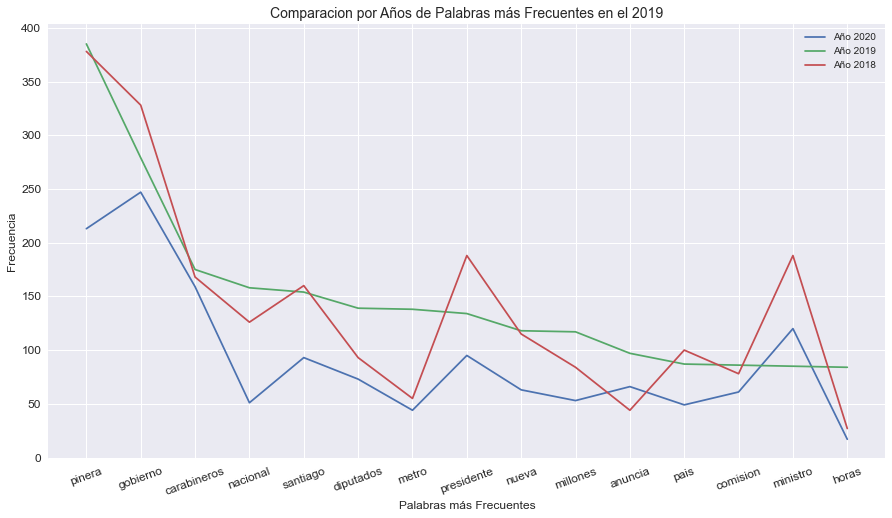

In [14]:
#plot top words of 2019
plot_freq_words(df_top_year,2019)

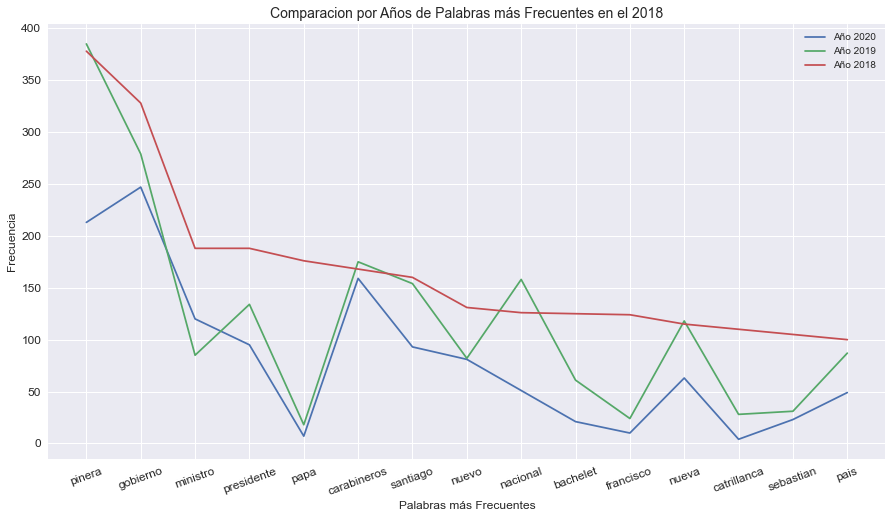

In [15]:
#plot top words of 2018
plot_freq_words(df_top_year,2018)